# CUSTOMER CHURN ANALYSIS & PREDICTION 📈

# Contents

1. [Introduction](#1)

2. [Loading libraries and data](#2)

3. [Understanding the data](#3)

4. [Data Cleaning](#4)

5. [Exploratory Data Analysis](#5)

6. [Data Preprocessing](#6)

7. [Model Selection & Evaluation](#7)

8. [Interpretation](#8)

9. [Recommendations for Customer Retention](#9)

# 1. Introduction  <a class="anchor"  id="1"></a>

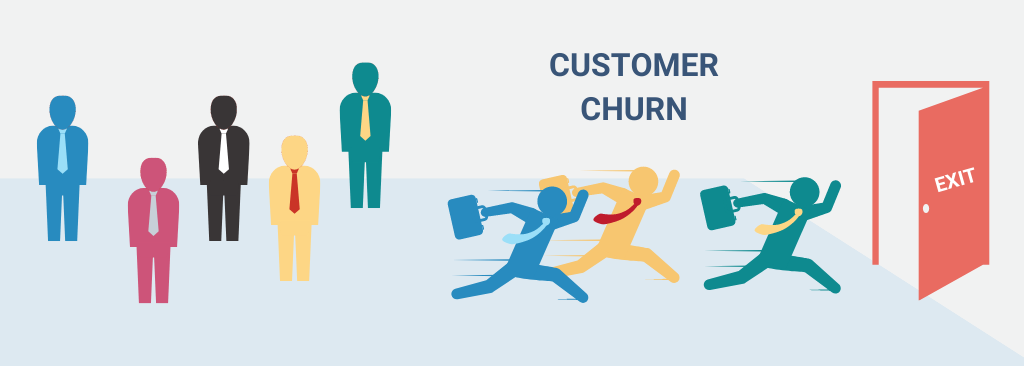

> #### What is Customer churn?

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

**To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.**

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.

# 2. Loading libraries and data  <a class="anchor"  id="2"></a>

In [1]:
# Import the required libraries.

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Load the data.

data=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 3. Understanding the data  <a class="anchor"  id="3"></a>

#### Each row represents the customer and each column contains customer's attributes based on the column metadata

In [3]:
# Check the 5 first rows of the dataset.

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


> ### The dataset contains information about:



* **Customers who left within the last month** – the column is called Churn

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [4]:
# Size of the dataset

data.shape

(7043, 21)

In [5]:
# Column attributes

data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Data types in each column

data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Description of the dataset

data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Summary of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Number of customers that were retained and churned.

data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
# Create separate dataframes for retained and churned customers.

retained_cust=data[data.Churn == 'No']
churned_cust=data[data.Churn == 'Yes']


# Get the number of rows for each dataframe.

num_retained_cust=retained_cust.shape[0]
num_churned_cust=churned_cust.shape[0]
total_cust_num=data.shape[0]


# Percentage of customers that were retained and left (results rounded to 2 decimals).

print(round(num_retained_cust / total_cust_num * 100,2), "% of customers were retained.")
print(round(num_churned_cust / total_cust_num * 100,2), "% of customers have churned.")

73.46 % of customers were retained.
26.54 % of customers have churned.


# 4. Data Cleaning  <a class="anchor"  id="4"></a>

In [11]:
# Check for missing values

data.isna().sum()               # No missing values found

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#  Drop the column customerID, since it is not necessary for our analysis.

df=data.drop('customerID', axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 5. Exploratory Data Analysis  <a class="anchor"  id="5"></a>


> ### **Splitting the variables into 3 main categories:**

#### 1.        Customer Demographics
#### 2.        Customer Account Information
#### 3.        Signed Services

### 1. Customer Demographics

<Axes: xlabel='gender', ylabel='count'>

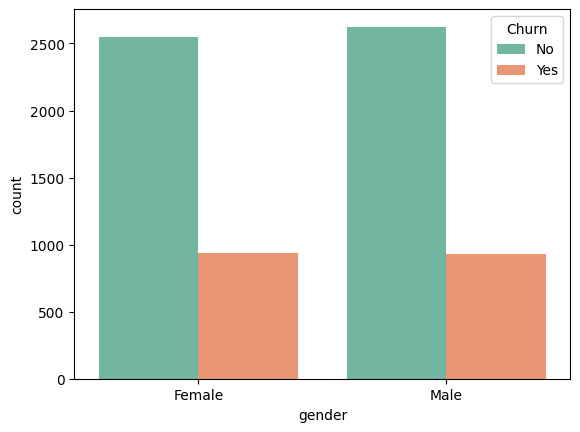

In [13]:
# Visualize the customer churn.

sns.countplot(x='gender', hue='Churn', palette='Set2', data=df)

#### Insight: Gender does not appear to be a significant factor when it comes to customer churn.

<Axes: xlabel='SeniorCitizen', ylabel='count'>

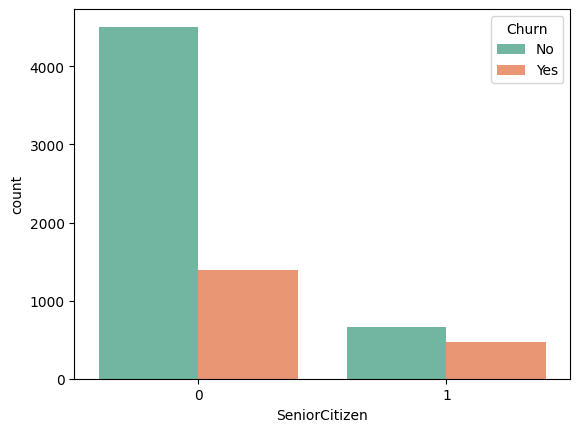

In [14]:
# Visualize the churn in relation to the age of the customer(SeniorCitizen or not).


sns.countplot(x='SeniorCitizen', hue='Churn', palette='Set2', data=df)

#### Insight: The majority of the customers that churn are not senior citizens.

<Axes: xlabel='Dependents', ylabel='count'>

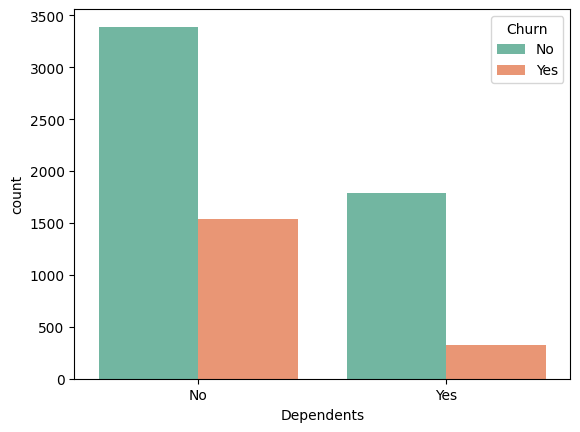

In [15]:
# Visualize the customer churn in relation to the dependents variable.

sns.countplot(x='Dependents', hue='Churn', palette='Set2', data=df)

#### Insight: The majority of the customers that left the company did not have dependents.

<Axes: xlabel='Partner', ylabel='count'>

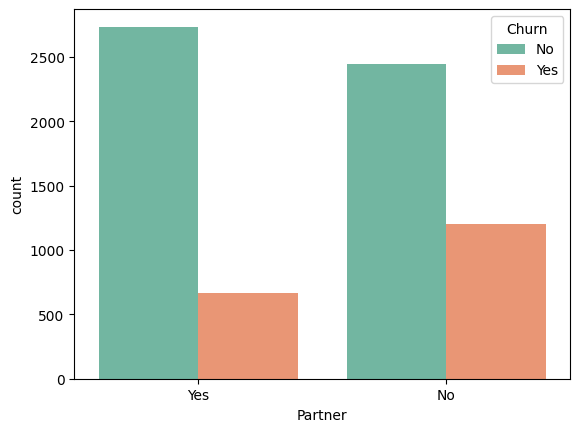

In [16]:
# Visualize the customer churn in relation to the partner variable.

sns.countplot(x='Partner', hue='Churn', palette='Set2', data=df)

#### Insight: It appears that most of the customers that churn, do not have partners.

### 2. Customer Account Information 

<Axes: xlabel='Contract', ylabel='count'>

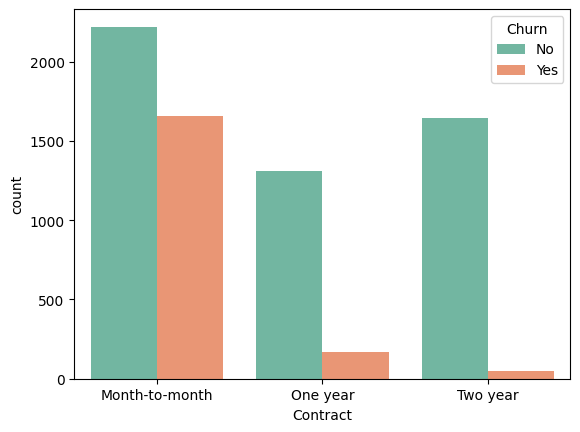

In [17]:
# Visualize the customer churn in relation to the contract.

sns.countplot(x='Contract', hue='Churn', palette='Set2', data=df)

#### Insight: Month-to-month contracts seem to have the highest amount of churned customers, while 2-year contracts have the least amount of churned customers, followed by 1-year contracts.

<Axes: xlabel='PaperlessBilling', ylabel='count'>

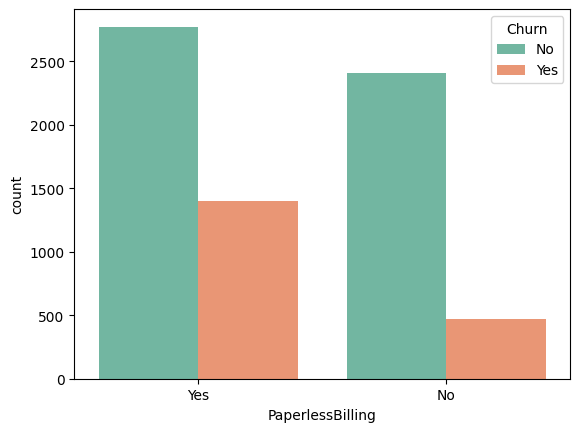

In [18]:
# Visualize the customer churn in relation to the paperless billing service.

sns.countplot(x='PaperlessBilling', hue='Churn', palette='Set2', data=df)

#### Insight: The majority of the customers that left the company had opted for paperless billing.

[Text(0, 0, 'Electronic check'),
 Text(1, 0, 'Mailed check'),
 Text(2, 0, 'Bank transfer (automatic)'),
 Text(3, 0, 'Credit card (automatic)')]

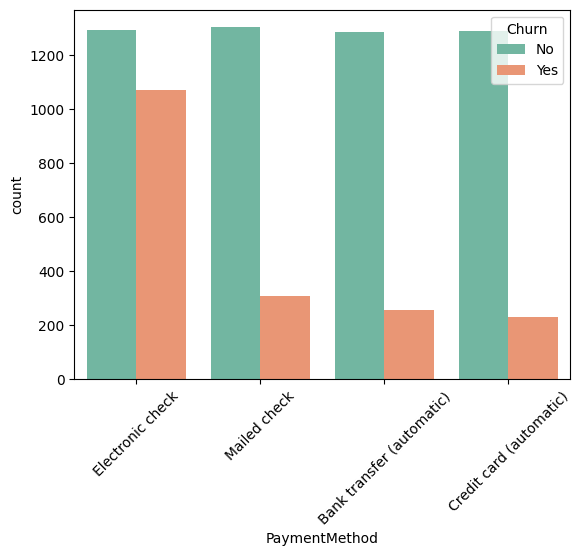

In [19]:
# Visualize the customer churn in relation to the payment method.

cplt=sns.countplot(x='PaymentMethod', hue='Churn', palette='Set2', data=df)
cplt.set_xticklabels(cplt.get_xticklabels(), rotation=45)

#### Insight: Most of the customers that churned had chosen the electronic check as the payment method. There is a significant difference between this payment method and the automatic ones (bank transfer, credit card) as well as the mailed check.

Text(0.5, 1.0, 'Tenure')

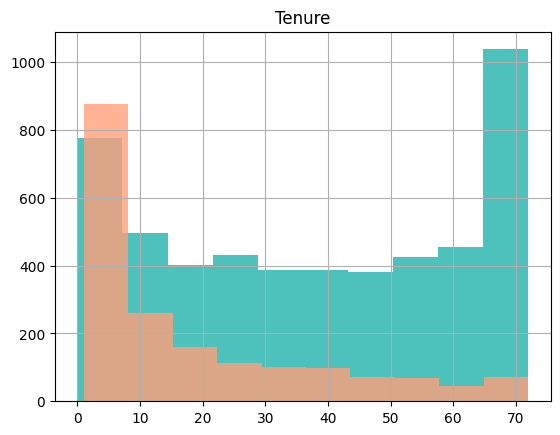

In [20]:
# Visualize the customer churn in relation to the number of months the customer stayed with the company.

data[df.Churn == 'No']['tenure'].hist(bins=10, color='lightseagreen', alpha=0.8)
data[df.Churn == 'Yes']['tenure'].hist(bins=10, color='lightsalmon', alpha=0.8)
plt.title('Tenure')

#### Insight: Between 0 and 8 months, the possibility of a customers churning is high. However, the longer a customers stays in the company, the less likely he/she is to churn.

Text(0.5, 1.0, 'Monthly Charges')

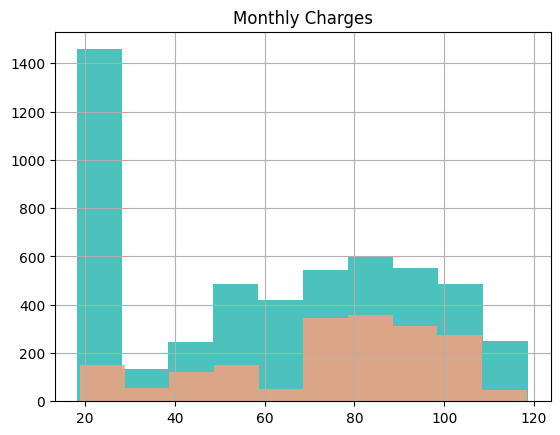

In [21]:
# Visualize the customer churn in relation to the customer's monthly charges.

data[df.Churn == 'No']['MonthlyCharges'].hist(bins=10, color='lightseagreen', alpha=0.8)
data[df.Churn == 'Yes']['MonthlyCharges'].hist(bins=10, color='lightsalmon', alpha=0.8)
plt.title('Monthly Charges')

#### Insight: The lower the amount of charges per month, the less likely the customer will churn. Especially for the range 18-28 dollars/month, the customer retention is extremely high. However, as the monthly charges increase, the probability of a customer churning increases as well.

## 3. Signed Services

<Axes: xlabel='InternetService', ylabel='count'>

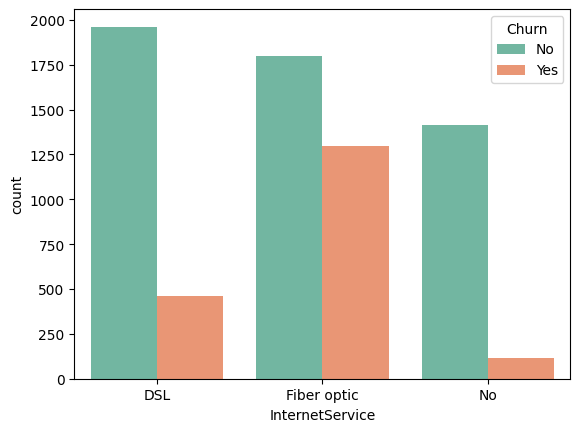

In [22]:
# Visualize the customer churn in relation to the internet service variable.

sns.countplot(x='InternetService', hue='Churn', palette='Set2', data=df)

#### Insight: It appears thet the majority of the customers that left the company had fiber optics, while the majority of the retained customers had a DSL internet service.

<Axes: xlabel='OnlineSecurity', ylabel='count'>

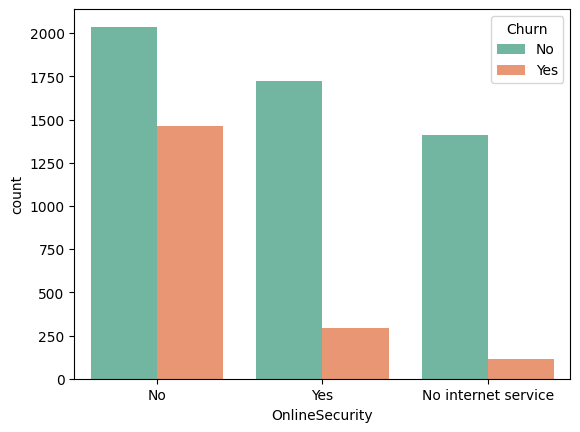

In [23]:
# Visualize the customer churn in relation to the online security variable.

sns.countplot(x='OnlineSecurity', hue='Churn', palette='Set2', data=df)

#### Insight: The majority of the customers that churned, did not have an online security.

<Axes: xlabel='PhoneService', ylabel='count'>

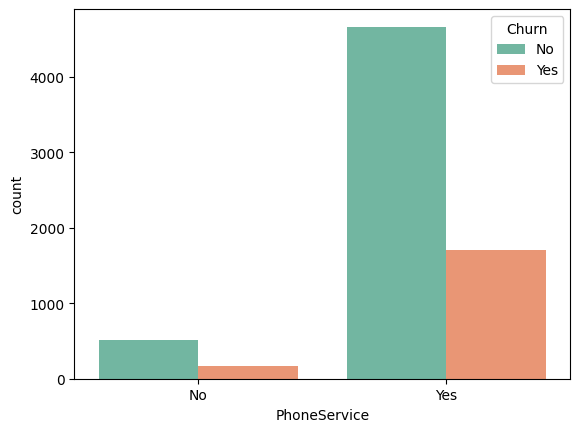

In [24]:
# Visualize the customer churn in relation to the phone service variable.

sns.countplot(x='PhoneService', hue='Churn', palette='Set2', data=df)

#### Insight: Most of the customers that get retained, already have a phone service with the company

<Axes: xlabel='MultipleLines', ylabel='count'>

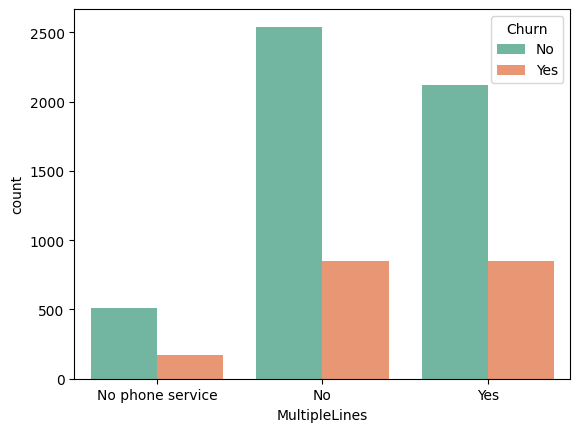

In [25]:
# Visualize the customer churn in relation to the multiple lines variable.

sns.countplot(x='MultipleLines', hue='Churn', palette='Set2', data=df)

#### Insight: The multiple lines service does not appear to be a significant factor when it comes to customer churn.

<Axes: xlabel='OnlineBackup', ylabel='count'>

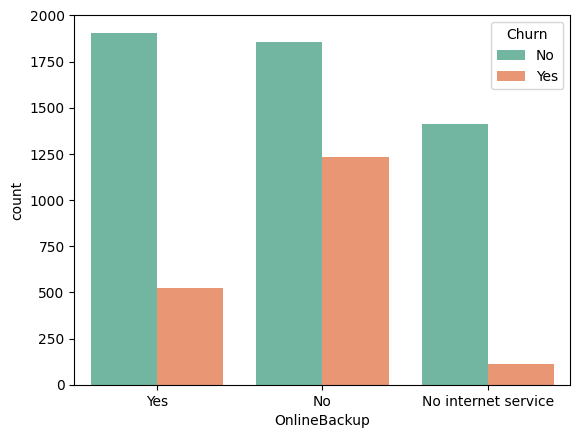

In [26]:
# Visualize the customer churn in relation to the online backup variable.

sns.countplot(x='OnlineBackup', hue='Churn', palette='Set2', data=df)

#### Insight: The majority of the customers that left the company did not have an online backup service.

<Axes: xlabel='DeviceProtection', ylabel='count'>

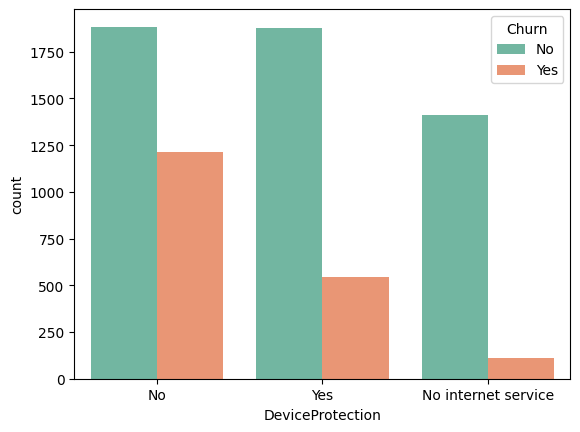

In [27]:
# Visualize the customer churn in relation to the device protection variable.

sns.countplot(x='DeviceProtection', hue='Churn', palette='Set2', data=df)

#### Insight: Most of the churned customers did not have a device protection service.

<Axes: xlabel='TechSupport', ylabel='count'>

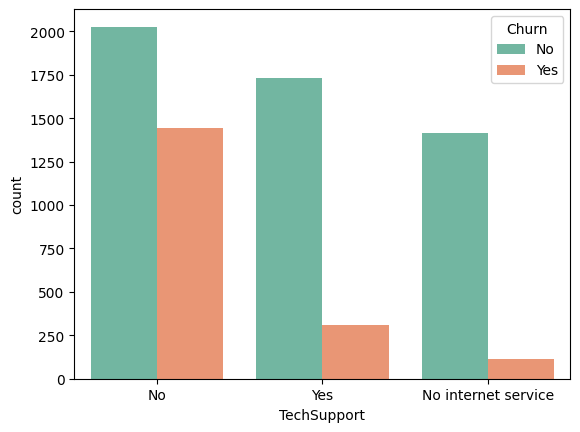

In [28]:
# Visualize the customer churn in relation to the tech support service.

sns.countplot(x='TechSupport', hue='Churn', palette='Set2', data=df)

#### Insight: The majority of the customers that churned did not have a tech support service.

<Axes: xlabel='StreamingTV', ylabel='count'>

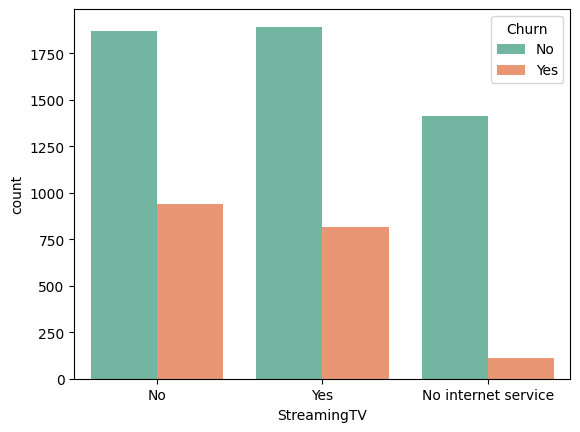

In [29]:
# Visualize the customer churn in relation to the streamingTV service.

sns.countplot(x='StreamingTV', hue='Churn', palette='Set2', data=df)

#### Insight: The streaming tv service does not appear to be significant when it comes to customer churn.

<Axes: xlabel='StreamingMovies', ylabel='count'>

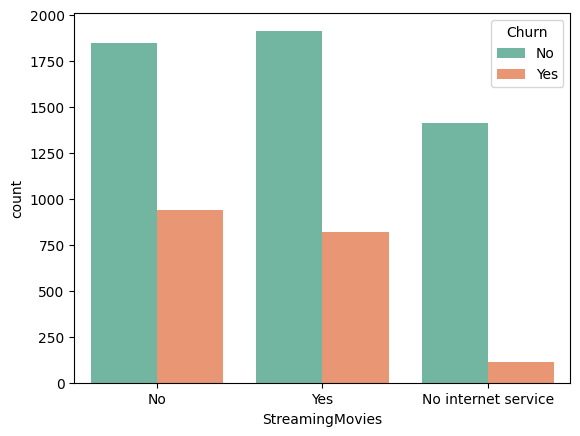

In [30]:
# Visualize the customer churn in relation to the streamingMovies service.

sns.countplot(x='StreamingMovies', hue='Churn', palette='Set2', data=df)

#### Insight: The streaming movies service does not appear to be a significant factor for customer churn.

# 6. Data Preprocessing  <a class="anchor"  id="6"></a>

>  ### Transforming categorical variables to numbers

In [31]:
# Convert non-numerical variables to numerical.

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['PaymentMethod'] = LabelEncoder().fit_transform(df['PaymentMethod'])
df['PaperlessBilling'] = LabelEncoder().fit_transform(df['PaperlessBilling'])
df['Contract'] = LabelEncoder().fit_transform(df['Contract'])
df['StreamingMovies'] = LabelEncoder().fit_transform(df['StreamingMovies'])
df['StreamingTV'] = LabelEncoder().fit_transform(df['StreamingTV'])
df['TechSupport'] = LabelEncoder().fit_transform(df['TechSupport'])
df['DeviceProtection'] = LabelEncoder().fit_transform(df['DeviceProtection'])
df['OnlineBackup'] = LabelEncoder().fit_transform(df['OnlineBackup'])
df['OnlineSecurity'] = LabelEncoder().fit_transform(df['OnlineSecurity'])
df['MultipleLines'] = LabelEncoder().fit_transform(df['MultipleLines'])
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])
df['InternetService'] = LabelEncoder().fit_transform(df['InternetService'])
df['PhoneService'] = LabelEncoder().fit_transform(df['PhoneService'])
df['Dependents'] = LabelEncoder().fit_transform(df['Dependents'])
df['Partner'] = LabelEncoder().fit_transform(df['Partner'])
df['MonthlyCharges']=LabelEncoder().fit_transform(df['MonthlyCharges'])
df['TotalCharges']=LabelEncoder().fit_transform(df['TotalCharges'])

In [32]:
# Checking the data type after data transformation

df.dtypes

gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int64
TotalCharges        int64
Churn               int64
dtype: object

In [33]:
# Data after transformation

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,2660,1


> ### Coorelation between features

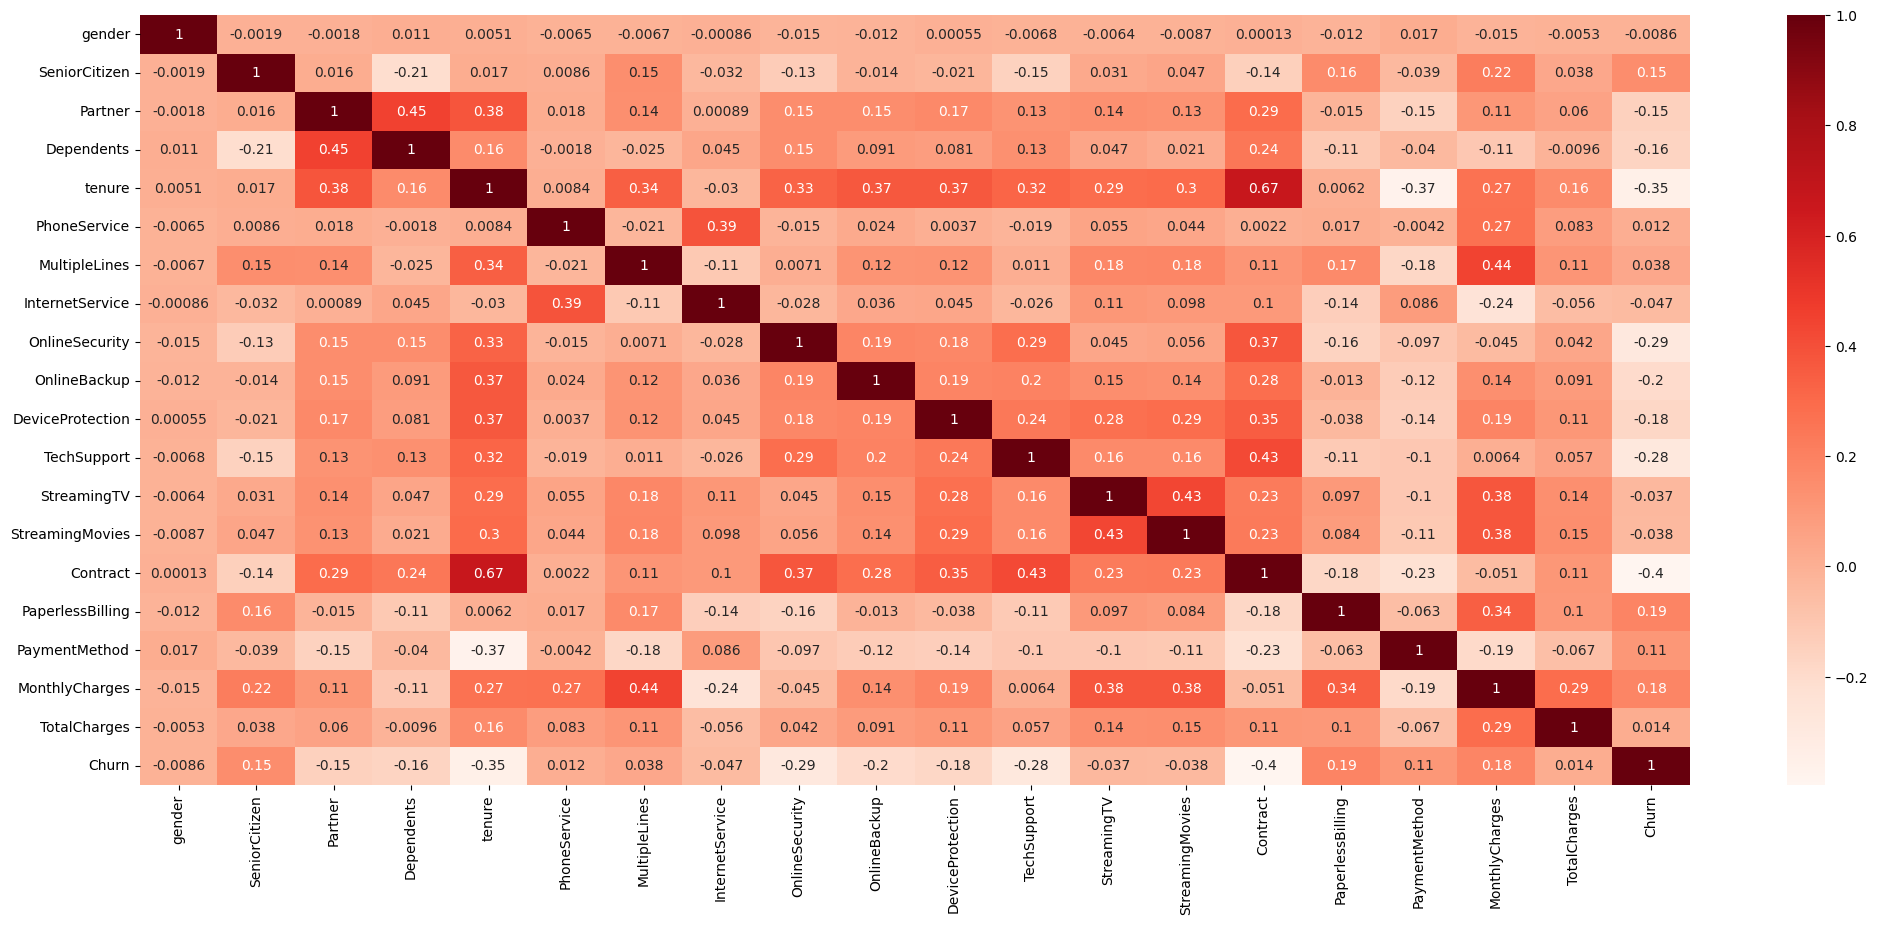

In [34]:
# Heatmap to show coorelation b/w features

plt.figure(figsize=(25,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [35]:
# Correlation b/w churn and other features

corr_matrix = df.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn               1.000000
PaperlessBilling    0.191825
MonthlyCharges      0.183523
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

In [36]:
# Scale data so that the result comprises only values between 0 and 1. 

X = df.drop('Churn', axis =1) 
y = df['Churn']

In [37]:
# Perform one-hot encoding.

X=pd.get_dummies(X)

In [38]:
# We split the data into 80% for training and 20% for testing.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Selection and Evaluation  <a class="anchor"  id="7"></a>

> #### In order to predict the probability of a customer staying or leaving the company, we will use logistic regression. Logistic regression is a statistical model used by Machine Learning to perform classification, in order to predict the probability of a binary (yes/no) event occurring.

In [39]:
scaler= StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
# We create the model.

model = LogisticRegression()


# We train the model.

model.fit(x_train, y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(x_test)
print(y_pred)

[1 0 0 ... 0 0 1]


In [42]:
# Print the scores of the training and testing set to check for overfitting.

print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.8040
Test set score: 0.8141


> #### The training set accuracy score is 0.8097, while the test set accuracy is 0.8219. These two values are quite comparable, so there is no question of overfitting.

In [43]:
# Confusion matrix.

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nThe confusion matrix shows', cm[0,0] + cm[1,1],'correct predictions and', cm[1,0] + cm[0,1], 'incorrect predictions.')

print('\nMore Specifically: ')

print('\n-True Positives (Actual Positive:1 and Predict Positive:1) = ', cm[0,0])

print('\n-True Negatives (Actual Negative:0 and Predict Negative:0) = ', cm[1,1])

print('\n-False Positives (Actual Negative:0 but Predict Positive:1) = ', cm[0,1], '(Type I error)')

print('\n-False Negatives (Actual Positive:1 but Predict Negative:0) = ', cm[1,0], '(Type II error)')

Confusion matrix

 [[934 102]
 [160 213]]

The confusion matrix shows 1147 correct predictions and 262 incorrect predictions.

More Specifically: 

-True Positives (Actual Positive:1 and Predict Positive:1) =  934

-True Negatives (Actual Negative:0 and Predict Negative:0) =  213

-False Positives (Actual Negative:0 but Predict Positive:1) =  102 (Type I error)

-False Negatives (Actual Positive:1 but Predict Negative:0) =  160 (Type II error)


<Axes: >

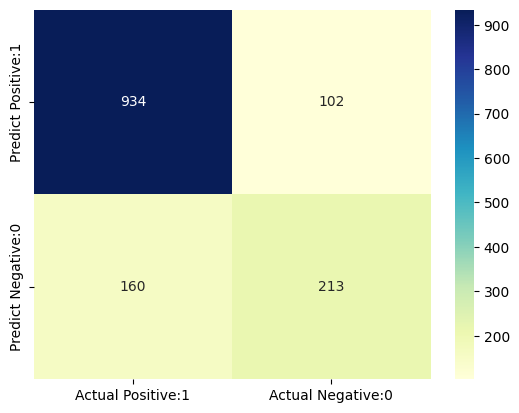

In [44]:
# Visualize the confusion matrix using a seaborn heatmap.

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [45]:
# We check its precision, recall, f1-score and accuracy.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



# 8. Interpretation  <a class="anchor"  id="8"></a>

> ### Retained customers :

* The precision of the model is 86%, meaning that 86% of the results are relevant.

* The recall of the model is 90%, meaning that 90% of the total relevant results were correctly classified by the model.

* The f1-score measuring the model's accuracy on the dataset is 88%, which is an ok result.

> ### Churned customers :

* The precision of the model is 69%, meaning that 69% of the results are relevant.
* 
* The recall of the model is 59%, meaning that 59% of the total relevant results were correctly classified by the model.
* 
* The f1-score measuring the model's accuracy on the dataset is 64%, which is an ok result.

> ## The accuracy of the model is 82%, which indicates great model performance.

# 9. Recommendations for customer retention   <a class="anchor"  id="9"></a>

> ### The Telco company could :

#### 1. Consider lowering the monthly charges to increase customer retention.

#### 2. Focus its efforts on the aquisition period of new customers (0-8 months), since the probabilities of customer churning are higher during that period.

#### 3. Investigate possible service quality issues with its fiber optic service and -if that's the case- work on resolving them.

#### 4. Consider proposing contracts with a starting duration of 1-2 year(s), since the churning probabilities are significantly lower in contrast to the month-to-month contracts.

#### 5.. Promote and eventually sign additional services to its customers, such as tech support, online backup, online security, etc., since the customers are more likely to stay in the company if they have signed up for other services as well.